# Team Apple - Project - Data Mining and Machine Learning
# Testing Notebook
This notebook was used in order to test and experiment with the different classifiers we have seen in class.
## 🧭 Project description 
Real or Not? NLP with Disaster Tweets: In this project you are challenged to build a Machine Learning model that can predict which tweets are about a real disaster and which are not. The project topic is based around a Kaggle competition.

## 👥 Team members
- Stéphane Vez
- Maël Maceiras
- Pierre Huber



## 📚 Libraries

First of all, we will import all the packages that we thought that we might use in order to get the best model. Please run the cells below⤵️

In [87]:
!python -m pip install --upgrade pip

  Using cached pip-20.3.1-py2.py3-none-any.whl (1.5 MB)
     |████████████████████████████████| 1.5 MB 5.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.5 MB 22.3 MB/s 
     |████████████████████████████████| 1.5 MB 34.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.5 MB 54.7 MB/s 
     |████████████████████████████████| 1.5 MB 59.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.5 MB 53.8 MB/s 
     |████████████████████████████████| 1.5 MB 62.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |█████████████████████████████

In [88]:
!python -m pip install spacy

In [89]:
!python -m spacy download en

     |████████████████████████████████| 12.0 MB 2.6 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [90]:
!python -m pip install nltk

In [91]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [92]:
# Import requiered packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
import spacy
import string
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import re
from nltk.corpus import stopwords
import numpy as np
from collections import defaultdict
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import plotly.graph_objects as go


%matplotlib inline

In [93]:
def evaluate(true, pred):
    precision = precision_score(true, pred)
    recall = recall_score(true, pred)
    f1 = f1_score(true, pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

## 📂 Data

Secondly, we have to import the data that were prodived for this specific project. The dataset "training_processed" has been created during our EDA&Processing.

In [94]:
sample = pd.read_csv('https://raw.githubusercontent.com/PierreHuber/DMML_Apple/main/data/sample_submission.csv')
test = pd.read_csv("https://raw.githubusercontent.com/PierreHuber/DMML_Apple/main/data/test_data.csv")
test = test.set_index(test.id).drop(columns=['id'])
training_processed = pd.read_csv('https://raw.githubusercontent.com/PierreHuber/DMML_Apple/main/data/training_processed.csv')
dfplot_sub = pd.read_csv("https://raw.githubusercontent.com/PierreHuber/DMML_Apple/main/Documents/progress_sub.csv")


## 📊 Summary of our results

The following table summaries the different models as well as the parameters we used. On the far right of the table, you can observe the accuracy scores returned after submission on the AiCrowd platform.

Sub | Classifier | Tokenizer + details | score
--- | --- | --- | ---
1 | LogReg(max_iter=1000) | TF-IDF default, Simple Tokenizer | 0.806
2 | LogReg(max_iter=1000) | TF-IDF default, duplicates dropped |  0.7819
3 | LogReg(max_iter=1000) | TF-IDF default, Tokenizer = SimplePreprocess |  0.7819
4 | LogRegCV(cv=5, max_iter=1000) | Tokenizer = SimplePreprocess | 0.7224
5 | LogRegCV(cv=5, max_iter=1000) | Tokenizer = SimplePreprocess, duplicates dropped | 0.7863
6 | LogRegCV(cv=5, max_iter=1000) | TF-IDF default, Simple Tokenizer | 0.813
7 | LogRegCV(cv=5, max_iter=1000) | TF-IDF default, Simple Tokenizer, Resampled | 0.800
8 | RandomForestClassifier | TF-IDF default, Simple Tokenizer | 0.799
9 | RandomForestClassifier | TF-IDF default, Simple Tokenizer, Resampled |  0.800
10 | LogRegCV(cv=5, max_iter=1000) | TF-IDF default, merge keywords-tokens | 0.809
11 | LogReg(max_iter=1000)| TF-IDF default, merge keywords-tokens | 0.808
12 | LogRegCV(cv=5, max_iter=1000) | TF-IDF default, Improved Tokenizer, merge keywords-tokens | 0.813
13 | LogReg(max_iter=10000)| TF-IDF default, merge keywords-tokens, hyperparams tuning: C=1.206792| 0.801
14 | LogReg(max_iter=10000)| TF-IDF default, merge keywords-tokens, hyperparams tuning: C=1.7575 | 0.8091
15 | LogReg(max_iter=10000)| TF-IDF default, hyperparams tuning: C=1.7575 | 0.8126
16 | LogReg(max_iter=1000)| TF-IDF default, hyperparams tuning: C=1.7575 | 0.8126
17 | LogReg(max_iter=1000)| TF-IDF params tunning (ngram_range=(1, 3), min_df= 1, max_df=1.0)), C=1.2 | 0.8091
18 | LogReg(max_iter=1000)| TF-IDF params tunning (ngram_range=(1, 3), min_df= 1, max_df=4.0)), C=1.2, merge keywords-tokens | 0.8038
19 | KNN | K = 5 |  0.6193


Below, you can observe a plot illustrating the accuracy of our different Submissions for the project. As you can see, it has been a rollercoaster as we tried different approaches, some being more successful than others.
Plot inspired by https://plotly.com/python/creating-and-updating-figures/

In [ ]:
plotsub = go.Figure(data=go.Scatter(x=dfplot_sub.submission_number,
                                y=dfplot_sub.accuracy_score,
                                mode='lines')) 
plotsub.update_layout(title='Accuracy Score fluctuation during the challenge',
                  xaxis_title="# of Submission", 
                  yaxis_title="Accuracy score",
                  title_x=0.5)
plotsub.show()

##  Tokenizer

In [95]:
def spacy_tokenizer(sentence):
    mytokens = sp(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    return mytokens

In [96]:
sp = spacy.load('en')
punctuations = string.punctuation
stop_words = spacy.lang.en.stop_words.STOP_WORDS

## 💻 Models

In [97]:
training_processed

,keyword,location,text,target,tokens,list_tokens,tokens2,merged,merged2
0,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0,black eye 9 space battle occur star o784 invol...,"['black', 'eye', 'space', 'battle', 'occur', '...",black eye space battle occur star o784 involve...,destroyed black eye 9 space battle occur star ...,destroyed black eye space battle occur star o7...
1,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0,world fedex longer transport bioterror germ wa...,"['world', 'fedex', 'longer', 'transport', 'bio...",world fedex longer transport bioterror germ wa...,bioterror world fedex longer transport bioterr...,bioterror world fedex longer transport bioterr...
2,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1,reality training train fall elevated track win...,"['reality', 'training', 'train', 'fall', 'elev...",reality training train fall elevated track win...,windstorm reality training train fall elevated...,windstorm reality training train fall elevated...
3,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1,taiwan grace expect large rock tree mud unstab...,"['taiwan', 'grace', 'expect', 'large', 'rock',...",taiwan grace expect large rock tree mud unstab...,hazardous taiwan grace expect large rock tree ...,hazardous taiwan grace expect large rock tree ...
4,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1,new isis video isis threaten behead croatian h...,"['new', 'isis', 'video', 'isis', 'threaten', '...",new isis video isis threaten behead croatian h...,hostage new isis video isis threaten behead cr...,hostage new isis video isis threaten behead cr...
...,...,...,...,...,...,...,...,...,...
6466,earthquake,ARGENTINA,#Earthquake #Sismo M 1.9 - 15km E of Anchorage...,1,earthquake sismo m 1.9 15 km e anchorage alask...,"['earthquake', 'sismo', 'm', '1.9', 'km', 'e',...",earthquake sismo m 1.9 km e anchorage alaska t...,earthquake earthquake sismo m 1.9 15 km e anch...,earthquake earthquake sismo m 1.9 km e anchora...
6467,derail,NaN,@EmiiliexIrwin Totally agree.She is 23 and kno...,0,@emiiliexirwin totally agree 23 know birth con...,"['totally', 'agree', 'know', 'birth', 'control...",totally agree know birth control true want der...,derail @emiiliexirwin totally agree 23 know bi...,derail totally agree know birth control true w...
6468,trapped,NaN,Hollywood Movie About Trapped Miners Released ...,1,hollywood movie trapped miners release chile 3...,"['hollywood', 'movie', 'trapped', 'miners', 'r...",hollywood movie trapped miners release chile h...,trapped hollywood movie trapped miners release...,trapped hollywood movie trapped miners release...
6469,weapons,Beirut/Toronto,Friendly reminder that the only country to eve...,1,friendly reminder country use nuclear weapon u...,"['friendly', 'reminder', 'country', 'use', 'nu...",friendly reminder country use nuclear weapon u...,weapons friendly reminder country use nuclear ...,weapons friendly reminder country use nuclear ...


In [98]:
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(training_processed.tokens, training_processed.target, test_size=0.2, random_state=72)

In [99]:
def pipe_sub(X_train, y_train, X_test, vectorizer, classifier):
    pipe = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])
    pipe.fit(X_train, y_train)
    print('Train accuracy: ', round(pipe.score(X_train, y_train),2))
    y_pred=pipe.predict(X_test)
    return y_pred

In [100]:
def y_pred_sub(y_pred, csv):
  sample_i = pd.read_csv('https://raw.githubusercontent.com/PierreHuber/DMML_Apple/main/data/sample_submission.csv')
  sample_i.target=y_pred
  return sample_i.to_csv(csv, index = False)

### Submission 1: LogisticRegression, Simple Tokenizer, TF-IDF default

In [101]:
X_train = training_processed.tokens
y_train = training_processed.target
X_test = test.text
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=LogisticRegression(solver='lbfgs', max_iter=1000)

In [102]:
y_pred=pipe_sub(X_train, y_train, X_test, vectorizer, classifier)

Train accuracy:  0.89


In [103]:
y_pred_sub(y_pred, r'sub1.csv')

In [104]:
#split: We split the dataset in 80-20% in order to test our model
X_train = X_train_split
y_train = y_train_split
X_test = X_test_split
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=LogisticRegression(solver='lbfgs', max_iter=1000)
pipe = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])
pipe.fit(X_train, y_train)
y_pred_test=pipe.predict(X_test)


In [105]:
round(accuracy_score(y_test_split, y_pred_test),3)

0.805

### Submission 2: LogisticRegression, TF-IDF default, duplicates dropped

In [106]:
X_train = training_processed.text
y_train = training_processed.target
X_test = test.text
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=LogisticRegression(solver='lbfgs', max_iter = 1000)
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                 tokenizer=<function spacy_tokenizer at 0x7f62fb3426a8>,
                                 use_idf=True, vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_in

In [107]:
y_pred_test=pipe.predict(X_test)

In [108]:
y_pred_sub(y_pred, r'sub2.csv')

In [109]:
#split: We split the dataset in 80-20% in order to test our model
X_train = X_train_split
y_train = y_train_split
X_test = X_test_split
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
pipe = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])
pipe.fit(X_train, y_train)
y_pred_test=pipe.predict(X_test)


In [110]:
round(accuracy_score(y_test_split, y_pred_test),3)

0.8

### Submission 3/4/5: LogisticRegression and LogisticRegressionCV, SimplePreprocess as Tokenizer, duplicates were deleted

In [111]:
from gensim.utils import simple_preprocess

In [112]:
#split: We split the dataset in 80-20% in order to test our model
X_train = X_train_split
y_train = y_train_split
X_test = X_test_split
vectorizer_simple = TfidfVectorizer(tokenizer=simple_preprocess)
classifier=LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
pipe = Pipeline([('vectorizer', vectorizer_simple),
                 ('classifier', classifier)])
pipe.fit(X_train, y_train)
y_pred_test=pipe.predict(X_test)

In [113]:
round(accuracy_score(y_test_split, y_pred_test),3)

0.793

### Submission 6: LogisticRegressionCV (CV = 5), Simple Tokenizer, best score

In [114]:
X_train = training_processed.tokens
y_train = training_processed.target
X_test = test.text
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)

In [115]:
X_test

id
9972     Crptotech tsunami and banks.\n http://t.co/KHz...
9865     I'm that traumatised that I can't even spell p...
1937     @foxnewsvideo @AIIAmericanGirI @ANHQDC So ... ...
3560     Me watching Law &amp; Order (IB: @sauldale305)...
2731                     Papi absolutely crushed that ball
                               ...                        
3497     @ItsQueenBaby I'm at work it's a bunch of ppl ...
9191     #?? #?? #??? #??? Suicide bomber kills 15 in S...
10217    Eruption of Indonesian volcano sparks transpor...
5308     Never let fear get in the way of achieving you...
8044     wowo--=== 12000 Nigerian refugees repatriated ...
Name: text, Length: 1142, dtype: object

In [116]:
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
pipe = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])
pipe.fit(X_train, y_train)                 
y_pred=pipe.predict(X_test)
sample.target=y_pred
sample.to_csv(r'sub6.csv', index = False)

In [117]:
#split: We split the dataset in 80-20% in order to test our model
X_train = X_train_split
y_train = y_train_split
X_test = X_test_split
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
pipe = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])
pipe.fit(X_train, y_train)
y_pred_test=pipe.predict(X_test)

In [118]:
round(accuracy_score(y_test_split, y_pred_test),3)

0.8

### Submission 7: Same as Submission 6 but with a resampling

In [123]:
rows=len(training_processed[training_processed.target==1]) #row of resampled df (baserate=0.5)
training_processed[training_processed.target==0].sample(rows)
training_resampled=pd.concat([training_processed[training_processed.target==1], training_processed[training_processed.target==0].sample(rows)], axis=0)
training_resampled.target.value_counts() 

1    2770
0    2770
Name: target, dtype: int64

In [124]:
X_train_resample = training_resampled.tokens
y_train_resample = training_resampled.target
X_test_resample = test.text

In [125]:
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
pipe = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])
                 
pipe.fit(X_train_resample, y_train_resample)

#train accuracy:
print('Train accuracy: ', round(pipe.score(X_train_resample, y_train_resample),2))

y_pred=pipe.predict(X_test_resample)
sample.target=y_pred
sample.to_csv(r'sub7.csv', index = False)

Train accuracy:  0.87


In [126]:
#split: We don't test our model here, because resampling the splitted data won't improve accuracy


### Submission 8: RandomForestClassifier, TF-IDF default

In [127]:
X_train = training_processed.tokens
y_train = training_processed.target
X_test = test.text
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=RandomForestClassifier()

In [128]:
y_pred=pipe_sub(X_train, y_train, X_test, vectorizer, classifier)

Train accuracy:  1.0


In [129]:
y_pred_sub(y_pred, r'sub8.csv')

In [130]:
#split: We split the dataset in 80-20% in order to test our model
X_train = X_train_split
y_train = y_train_split
X_test = X_test_split
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=RandomForestClassifier()
pipe = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])
pipe.fit(X_train, y_train)
y_pred_test=pipe.predict(X_test)


In [131]:
round(accuracy_score(y_test_split, y_pred_test),3)

0.773

### Submission 9: RandomForestClassifier, TF-IDF default, resampled

In [132]:
rows=len(training_processed[training_processed.target==1]) #row of resampled df (baserate=0.5)
training_processed[training_processed.target==0].sample(rows)
training_resampled=pd.concat([training_processed[training_processed.target==1], training_processed[training_processed.target==0].sample(rows)], axis=0)
training_resampled.target.value_counts() 


classifier = RandomForestClassifier()
pipe = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])
pipe.fit(X_train_resample, y_train_resample)
print('Train accuracy: ', round(pipe.score(X_train_resample, y_train_resample),2))

y_pred=pipe.predict(X_test_resample)
sample.target=y_pred
sample.to_csv(r'sub9.csv', index = False)


Train accuracy:  1.0


In [133]:
#split: We don't test our model here, because resampling the splitted data won't improve accuracy

### Submission 10: LogisticRegressionCV (CV = 5), TF-IDF default, Keywords and Tokens columns were merged

In [134]:
X_train = training_processed.merged
y_train = training_processed.target
X_test = test.text
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)

In [135]:
y_pred=pipe_sub(X_train, y_train, X_test, vectorizer, classifier)

Train accuracy:  0.92


In [136]:
y_pred_sub(y_pred, r'sub10.csv')

In [137]:
#split: We split the dataset in 80-20% in order to test our model
X_train = X_train_split
y_train = y_train_split
X_test = X_test_split
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
pipe = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])
pipe.fit(X_train, y_train)
y_pred_test=pipe.predict(X_test)


In [138]:
round(accuracy_score(y_test_split, y_pred_test),3)

0.8

### Submission 11: LogisticRegression default, TF-IDF default, Keywords and Tokens columns were merged

In [139]:
X_train = training_processed.merged
y_train = training_processed.target
X_test = test.text
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=LogisticRegression(solver='lbfgs')

In [140]:
y_pred=pipe_sub(X_train, y_train, X_test, vectorizer, classifier)

Train accuracy:  0.88


In [141]:
y_pred_sub(y_pred, r'sub11.csv')

In [142]:
#split: We split the dataset in 80-20% in order to test our model
X_train = X_train_split
y_train = y_train_split
X_test = X_test_split
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=LogisticRegression(solver='lbfgs')
pipe = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])
pipe.fit(X_train, y_train)
y_pred_test=pipe.predict(X_test)


In [143]:
round(accuracy_score(y_test_split, y_pred_test),3)

0.805

### Submission 12: LogisticRegressionCV (CV = 5), TF-IDF default, Improved Tokenizer, Keywords and Tokens were merged

In [144]:
X_train = training_processed.merged2
y_train = training_processed.target
X_test = test.text
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)

In [145]:
y_pred=pipe_sub(X_train, y_train, X_test, vectorizer, classifier)

Train accuracy:  0.91


In [146]:
y_pred_sub(y_pred, r'sub12.csv')

In [147]:
#split: We split the dataset in 80-20% in order to test our model
X_train = X_train_split
y_train = y_train_split
X_test = X_test_split
vectorizer=TfidfVectorizer(tokenizer=spacy_tokenizer)
classifier=LogisticRegressionCV(solver='lbfgs', cv=5, max_iter=1000)
pipe = Pipeline([('vectorizer', vectorizer),
                 ('classifier', classifier)])
pipe.fit(X_train, y_train)
y_pred_test=pipe.predict(X_test)


In [148]:
round(accuracy_score(y_test_split, y_pred_test),3)

0.8

### Submissions 13/14/15: LogisticRegression (C = 1.206/1.75), Hyperparameters tunning with GridSearchCV, TF-IDF default, Simple and Improved Tokenizer, Keywords and Tokens were merged, also tried on Tokens only

In [149]:
## We import the new package
#from sklearn.model_selection import GridSearchCV

In [150]:
X_train = training_processed['merged']
y_train = training_processed['target']
X_test = test.text

In [151]:
##The different parameters we would like to evaluate are defined
#C = np.logspace(-4,4,50)
#penalty = ['l2']
#param_grid = dict(classifier__C=C, classifier__penalty = penalty)


In [152]:
# tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer)
#pipe = Pipeline([('vectorizer', tfidf_vector),
#                 ('classifier', LogModel)])
#pipe.fit(X_train, y_train)

In [153]:
#grid = GridSearchCV(pipe, param_grid)
#grid.fit(X_train, y_train)
#sorted(grid.cv_results_.keys())

In [154]:
## We extract the different parameters in order to report them in the LogModel below. After we excute the regression
#grid.best_estimator_
#grid.best_estimator_.get_params()

In [155]:
LogModel = LogisticRegression(C=1.2067926406393288, max_iter=10000)

In [156]:
tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer)
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', LogModel)])
pipe.fit(X_train, y_train)


#train accuracy:
print('Train accuracy: ', round(pipe.score(X_train, y_train),2))

Train accuracy:  0.89


In [157]:
y_pred=pipe.predict(X_test)
sample.target=y_pred
sample.to_csv(r'sub13.csv', index = False)

In [158]:
X_train = training_processed.tokens
y_train = training_processed.target
X_test = test.text

In [159]:
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', LogModel)])
pipe.fit(X_train, y_train)


#train accuracy:
print('Train accuracy: ', round(pipe.score(X_train, y_train),2))

y_pred=pipe.predict(X_test)
sample.target=y_pred
sample.to_csv(r'sub14.csv', index = False)

Train accuracy:  0.9


In [160]:
#grid = GridSearchCV(pipe, param_grid)
#grid.fit(X_train, y_train)
#sorted(grid.cv_results_.keys())

In [161]:
#grid.best_estimator_
#grid.best_estimator_.get_params()

In [162]:
LogModel2 = LogisticRegression(C=1.7575106248547894, max_iter=10000)


In [163]:
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', LogModel2)])
pipe.fit(X_train, y_train)


#train accuracy:
print('Train accuracy: ', round(pipe.score(X_train, y_train),2))

y_pred=pipe.predict(X_test)
sample.target=y_pred
sample.to_csv(r'sub15.csv', index = False)

Train accuracy:  0.92


All these submissions had a disappointing output, we expected more from the tuning of the hyperparameters. We will keep investigating on how to use these.

### Submission 16: LogisticRegression (C = 1.75), Hyperparameters tunning with GridSearchCV, TF-IDF default, Improved Tokenizer, Keywords and Tokens were merged

In [164]:
#df_train_merge = training
#df_train_merge['merge2'] = df_train_merge['keyword'] + ' ' + df_train_merge['tokens2']
#df_train_merge['merge2'].fillna(' ', inplace=True)
#df_train_merge

In [165]:
#redefinir pipe
LogModel = LogisticRegression(max_iter=10000)
pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', LogModel)])

In [167]:
X_train = training_processed.merged2
y_train = training_processed.target
X_test = test.text

##The different parameters we would like to evaluate are defined
#C = np.logspace(-4,4,50)
#penalty = ['l2']
#param_grid = dict(classifier__C=C, classifier__penalty = penalty)
#grid = GridSearchCV(pipe, param_grid)
#grid.fit(X_train, y_train)
#sorted(grid.cv_results_.keys())

In [ ]:
#grid.best_estimator_
#grid.best_estimator_.get_params()
# same C as before, hence same results

In [168]:
LogModel6 = LogisticRegression(C=1.7575106248547894, max_iter=10000)

pipe = Pipeline([('vectorizer', tfidf_vector),
                 ('classifier', LogModel6)])
pipe.fit(X_train, y_train)


#train accuracy:
print('Train accuracy: ', round(pipe.score(X_train, y_train),2))

y_pred=pipe.predict(X_test)
sample.target=y_pred
sample.to_csv(r'sub16.csv', index = False)

Train accuracy:  0.89



### Submission 17: LogisticRegression (C = 1.2), TF-IDF parameters tunning, Simple Tokenizer

For this part, we used the part 4.3.1 of the lab "Text_Analytics" in order to see all the different possibilities for the parameters of the TF-IDF

In [171]:
X_train = X_train_split
y_train = y_train_split
X_test = X_test_split

In [169]:
# Create list of configs
#def configs():

#    models = list()
    
    # Define config lists
#    ngram_range = [(1,1), (1,2), (1, 3), (2, 2), (2, 3), (3, 3)]
#    min_df = [1]
#    max_df = [1.0]
#    analyzer=['word', 'char']
#    
    # Create config instances
#        for i in min_df:
#    for n in ngram_range:
#            for j in max_df:
#              for a in analyzer:
#                    cfg = [n, i, j, a]
#                    models.append(cfg)
#    return models

#configs = configs()
#configs[:10]

In [186]:
# Define list for result
#result = []

#for config in configs:

    # Redefine vectorizer
#    tfidf_vector = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   #ngram_range=config[0],
                                   #min_df=config[1], max_df=config[2], analyzer=config[3])

    # Define classifier
#    classifier = LogisticRegression()

    # Create pipeline
#    pipe = Pipeline([('vectorizer', tfidf_vector),
#                 ('classifier', classifier)])

    # Fit model on training set
#    pipe.fit(X_train, y_train)

    # Predictions
#    y_pred = pipe.predict(X_test)

    # Print accuracy on test set
#    print("CONFIG: ", config)
#    evaluate(y_test, y_pred)
#    print("-----------------------")

    # Append to result
#    result.append([config, accuracy_score(y_test, y_pred)])

In [172]:
 tfidf_vector_tunned = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=(1, 3),
                                   min_df= 1, max_df=1.0, analyzer='word')

In [173]:
#split: We split the dataset in 80-20% in order to test our model
X_train = X_train_split
y_train = y_train_split
X_test = X_test_split
classifier=LogisticRegression(C=1.2, max_iter=1000)
pipe = Pipeline([('vectorizer', tfidf_vector_tunned),
                 ('classifier', classifier)])
pipe.fit(X_train, y_train)
y_pred_test=pipe.predict(X_test)

In [174]:
round(accuracy_score(y_test_split, y_pred_test),3)

0.802

In [175]:
X_train = training_processed.tokens
y_train = training_processed.target
X_test = test.text
classifier=LogisticRegression(C=1.2, max_iter=1000)
pipe = Pipeline([('vectorizer', tfidf_vector_tunned),
                 ('classifier', classifier)])
pipe.fit(X_train, y_train)
y_pred_test=pipe.predict(X_test)

In [176]:
X_test
print('Train accuracy: ', round(pipe.score(X_train, y_train),2))

y_pred=pipe.predict(X_test)
sample.target=y_pred
sample.to_csv(r'sub17.csv', index = False)

Train accuracy:  0.93


### Submission 18: LogisticRegression (C = 1.2), TF-IDF parameters tunning, Simple Tokenizer, Keywords and Tokens were merged

In [177]:
 tfidf_vector_tunned = TfidfVectorizer(tokenizer=spacy_tokenizer, 
                                   ngram_range=(1, 3),
                                   min_df= 1, max_df=4.0, analyzer='word')

In [178]:
#split: We split the dataset in 80-20% in order to test our model
X_train = X_train_split
y_train = y_train_split
X_test = X_test_split
classifier=LogisticRegression(C=1.2, max_iter=1000)
pipe = Pipeline([('vectorizer', tfidf_vector_tunned),
                 ('classifier', classifier)])
pipe.fit(X_train, y_train)
y_pred_test=pipe.predict(X_test)

In [179]:
round(accuracy_score(y_test_split, y_pred_test),3)

0.802

In [180]:
X_train = training_processed.merged
y_train = training_processed.target
X_test = test.text
classifier=LogisticRegression(C=1.2, max_iter=1000)
pipe = Pipeline([('vectorizer', tfidf_vector_tunned),
                 ('classifier', classifier)])
pipe.fit(X_train, y_train)
y_pred_test=pipe.predict(X_test)

In [181]:
y_pred=pipe.predict(X_test)
sample.target=y_pred
sample.to_csv(r'sub18.csv', index = False)

### Submission 19: KNN, k = 5

In [182]:
training_for_knn=training_processed[['keyword', 'location', 'text', 'target']]
training_for_knn

,keyword,location,text,target
0,destroyed,USA,Black Eye 9: A space battle occurred at Star O...,0
1,bioterror,NaN,#world FedEx no longer to transport bioterror ...,0
2,windstorm,"Palm Beach County, FL",Reality Training: Train falls off elevated tra...,1
3,hazardous,USA,#Taiwan Grace: expect that large rocks trees m...,1
4,hostage,Australia,New ISIS Video: ISIS Threatens to Behead Croat...,1
...,...,...,...,...
6466,earthquake,ARGENTINA,#Earthquake #Sismo M 1.9 - 15km E of Anchorage...,1
6467,derail,NaN,@EmiiliexIrwin Totally agree.She is 23 and kno...,0
6468,trapped,NaN,Hollywood Movie About Trapped Miners Released ...,1
6469,weapons,Beirut/Toronto,Friendly reminder that the only country to eve...,1


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.5737


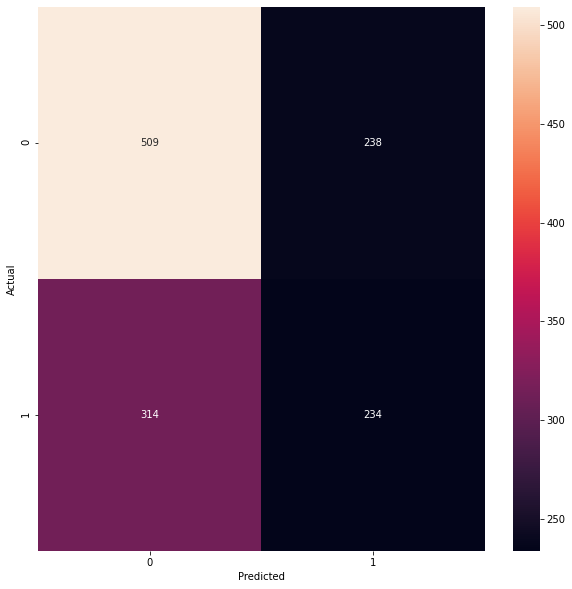

In [183]:
# Label Encoding
training_for_knn.keyword = training_for_knn.keyword.astype('category').cat.codes
training_for_knn.location = training_for_knn.location.astype('category').cat.codes
training_for_knn.text = training_for_knn.text.astype('category').cat.codes
training_for_knn.target = training_for_knn.target.astype('category').cat.codes
training_for_knn

# Select Features
X = training_for_knn.drop(["target"], axis=1)
y = training_for_knn.target

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)
X_train

# Normalization (since distance)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train) 
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)
X_train_norm[:10]

# Fit KNN model
from sklearn.neighbors import KNeighborsClassifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_norm, y_train)

# Prediction for test set
y_pred = knn.predict(X_test_norm)

# Evaluate model
def accuracy_conf_mat(y_test, y_pred):
  print(round(accuracy_score(y_test, y_pred), 4))
  conf_mat = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

accuracy_conf_mat(y_test, y_pred)

In [184]:
# Grid Search - hyperparameters tunning
from sklearn.model_selection import GridSearchCV

# Define parameters to test
grid = {'n_neighbors':np.arange(1,100),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

# Define and fit model
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=10)
knn_cv.fit(X_train_norm, y_train)

# Print results
print("Hyperparameters:", knn_cv.best_params_)
print("Train Score:", round(knn_cv.best_score_, 4))
print("Test Score:", round(knn_cv.score(X_test_norm, y_test), 4))

Hyperparameters: {'n_neighbors': 79, 'p': 1, 'weights': 'distance'}
Train Score: 0.6188
Test Score: 0.6193


0.5714


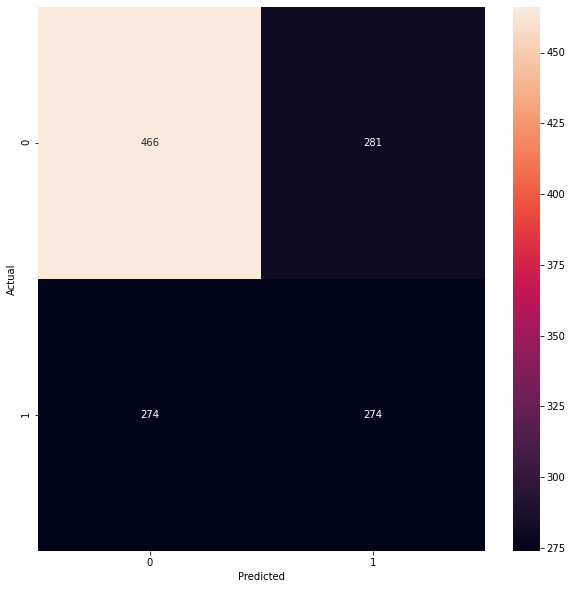

In [185]:
# Fit optimal KNN model
knn = KNeighborsClassifier(n_neighbors=1, p=2, weights='uniform')
knn.fit(X_train_norm, y_train)

# Prediction for test set
y_pred = knn.predict(X_test_norm)

# Evaluate model
def accuracy_conf_mat(y_test, y_pred):
  print(round(accuracy_score(y_test, y_pred), 4))
  conf_mat = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

accuracy_conf_mat(y_test, y_pred)